In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft

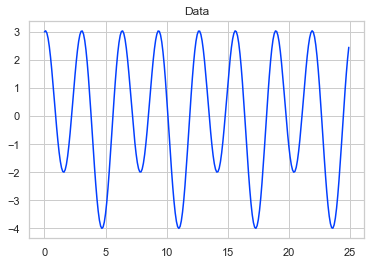

In [8]:
from scipy import signal
plt.title('Data')
x = np.arange(0, 25, 0.1)
y = np.sin(x) + (3*np.cos(2*x))
plt.plot(x,y)

In [9]:
signal_1 = pd.DataFrame(zip(x,y),columns=['Time','Value'])

# GMM on actual time series

In [10]:
dfx = signal_1
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [11]:
print(best_gmm, '\n')
print('WEIGHTS -', best_gmm.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', best_gmm.means_, '\n')

GaussianMixture(covariance_type='diag', n_components=6) 

WEIGHTS - [0.250048   0.04363704 0.24850447 0.12245564 0.10744208 0.22791277] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[13.17140654 -1.06506062]
 [ 4.7082454  -3.36592862]
 [21.07550063 -0.84349308]
 [ 2.07956443  0.03688183]
 [ 7.2842147  -0.10530144]
 [11.74317981  2.69726529]] 



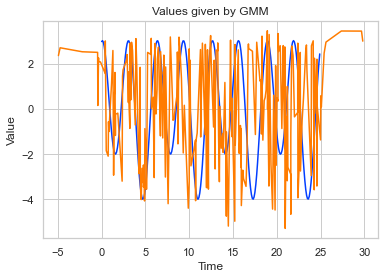

In [12]:
z,_ = best_gmm.sample(250)
plt.title('Actual data')
sns.lineplot(signal_1['Time'], signal_1['Value'])
#plt.show()
plt.title('Values given by GMM')
sns.lineplot(z[:,0],z[:,1])
plt.show()

# GMM on FFT of actual time series

In [13]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2+1]),np.abs(yf[:N//2+1])),columns=['Freq','Ampli'])
    return freq_ampli

In [14]:
freq_ampli1 = freq(signal_1)

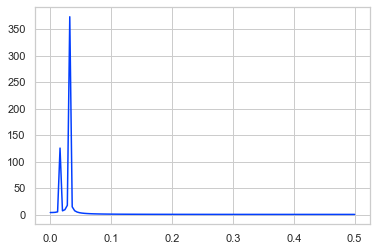

In [15]:
plt.plot(freq_ampli1['Freq'], freq_ampli1['Ampli'])

In [16]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 7)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm
best_gmm1 = GMM_fit(freq_ampli1)

In [17]:
print(best_gmm1, '\n')
print('WEIGHTS -', best_gmm1.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', best_gmm1.means_, '\n')

GaussianMixture(n_components=6) 

WEIGHTS - [0.42763691 0.00793651 0.00793651 0.22727133 0.31334573 0.01587302] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[3.94166106e-01 1.72517331e-01]
 [3.20000000e-02 3.73163245e+02]
 [1.60000000e-02 1.25325860e+02]
 [6.82567425e-02 2.39058477e+00]
 [2.07560941e-01 2.97495230e-01]
 [3.20000000e-02 1.59137356e+01]] 



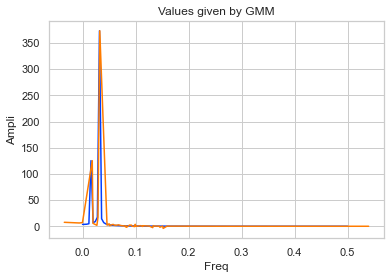

In [20]:
z1,_ = best_gmm1.sample(126)
plt.title('Actual data')
sns.lineplot(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#plt.show()
plt.title('Values given by GMM')
sns.lineplot(z1[:,0],z1[:,1])
plt.show()